# k-means with Three different Distance Metrics and Dimension Reduction 
We will apply manually dimension reduction to Iris data instead of using sklearn in python or R library and compare three different Distance Metrics.
The power of k-means algorithm is due to its computational
efficiency and the nature of ease at which it can be used.
Distance metrics are used to find similar data objects that lead
to develop robust algorithms for the data mining
functionalities such as classification and clustering.

In [31]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from matplotlib import pyplot as plt
import random
import math

# 1. Dimension Reduction

We will reduce the dimension manually instead of using sklearn in python or R library. Here we will convert the dimension of data from 2D (from x1 and x2) and (x3 and x4) to 1D (z1) and and 1D (z2), respectively.

In [32]:
#load the data
df=pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
#2D (from x1 and x2) to 1D (z1) 
df['Z1']=np.sqrt(df.sepal_length**2+df.sepal_width**2)
#(x3 and x4) to 1D (z2)
df['Z2']=np.sqrt(df.petal_length**2+df.petal_width**2)

Now we have 2D instead of the 4D

In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Z1,Z2
0,5.1,3.5,1.4,0.2,setosa,6.185467,1.414214
1,4.9,3.0,1.4,0.2,setosa,5.745433,1.414214
2,4.7,3.2,1.3,0.2,setosa,5.685948,1.315295
3,4.6,3.1,1.5,0.2,setosa,5.547071,1.513275
4,5.0,3.6,1.4,0.2,setosa,6.161169,1.414214


# 1.1. Find the cluster center:

Data point is assigned to the cluster center whose distance
from the cluster center is minimum of all the cluster centers. We are assuming we have 3 clusters.
$Center (x,y)=(\left(\sum_{i=1}^N \frac{x_i}{N}\right), \left(\sum_{i=1}^N \frac{y_i}{N}\right))$

In [34]:
Z1Cent_setosa=df[df.species=='setosa']['Z1'].mean()
Z2Cent_setosa=df[df.species=='setosa']['Z2'].mean()

In [35]:
Z1Cent_versicolor=df[df.species=='versicolor']['Z1'].mean()
Z2Cent_versicolor=df[df.species=='versicolor']['Z2'].mean()

In [36]:
Z1Cent_virginica=df[df.species=='virginica']['Z1'].mean()
Z2Cent_virginica=df[df.species=='virginica']['Z2'].mean()

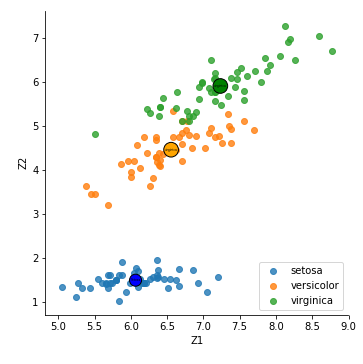

In [37]:
# Use the 'hue' argument to provide a factor variable
g=sns.lmplot( x="Z1", y="Z2", data=df, fit_reg=False, hue='species', legend=False)

bbox_Circle = dict(boxstyle="Circle,pad=0.3", fc="blue", ec="black", alpha=1)
plt.text(Z1Cent_setosa, Z2Cent_setosa, "Setosa", ha="center", va="center", size=3,bbox=bbox_Circle)
plt.annotate('Setosa', xy=(0.6,1.5), xytext=(1,1.55),
            arrowprops=dict(facecolor='blue', shrink=0.15)
            )
bbox_Circle = dict(boxstyle="Circle,pad=0.3", fc="orange", ec="black", alpha=1)
plt.text(Z1Cent_versicolor, Z2Cent_versicolor, "virginica", ha="center", va="center", size=3,bbox=bbox_Circle)
plt.annotate('versicolor', xy=(1.7,4.2), xytext=(2,4.2),
            arrowprops=dict(facecolor='orange', shrink=0.1)
            )

bbox_Circle = dict(boxstyle="Circle,pad=0.3", fc="green", ec="black", alpha=1)
plt.text(Z1Cent_virginica, Z2Cent_virginica, "virginica", ha="center", va="center", size=3,bbox=bbox_Circle)
plt.annotate('virginica', xy=(1.5,5.7), xytext=(0.8,5.7),
            arrowprops=dict(facecolor='g', shrink=0.1)
            )

# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

# DISTANCE METRICS

# 1.Basic Euclidean Distance Metric:
Euclidean distance computes the root of square difference
between co-ordinates of pair of objects. 

$Distance=\sqrt{\left(\sum_{k=1}^m (x_{ik}-x_{jk} \right)^2)}$

In [38]:
#copy df for euclidean calculation
dfE=df.copy()

In [40]:
dfE['setosa']=np.sqrt((dfE.Z1-Z1Cent_setosa)**2+(dfE.Z2-Z2Cent_setosa)**2)
dfE['versicolor']=np.sqrt((dfE.Z1-Z1Cent_versicolor)**2+(dfE.Z2-Z2Cent_versicolor)**2)
dfE['virginica']=np.sqrt((dfE.Z1-Z1Cent_virginica)**2+(dfE.Z2-Z2Cent_virginica)**2)

In [41]:
def calculate_new_clusters(row):
    if (row["setosa"] < row['versicolor']) and (row['setosa']<row['virginica']):
        return 'setosa'
    elif(row['versicolor']<row['virginica']):
        return 'versicolor' 
    else:
        return 'virginica'
#applying function to df
dfE["Cluster"] = dfE.apply(calculate_new_clusters,axis=1)

In [42]:
dfE.groupby(['Cluster']).count()['species']

Cluster
setosa        50
versicolor    52
virginica     48
Name: species, dtype: int64

# 2. Manhattan Distance Metric
Manhattan distance computes the absolute differences between coordinates of pair of objects

$Distance=|x_i-x_j|$

In [43]:
dfManhattan=df.copy()

In [45]:
dfManhattan['setosa']=np.abs(dfManhattan.Z1-Z1Cent_setosa)+np.abs(dfManhattan.Z2-Z2Cent_setosa)
dfManhattan['versicolor']=np.abs(dfManhattan.Z1-Z1Cent_versicolor)+np.abs(dfManhattan.Z2-Z2Cent_versicolor)
dfManhattan['virginica']=np.abs(dfManhattan.Z1-Z1Cent_virginica)+np.abs(dfManhattan.Z2-Z2Cent_virginica)

In [50]:
dfManhattan["Cluster"] = dfManhattan.apply(calculate_new_clusters,axis=1)
dfManhattan.groupby(['Cluster']).count()['species']

Cluster
setosa        51
versicolor    55
virginica     44
Name: species, dtype: int64

# 3. Minkowski Distance Metric

Minkowski Distance is the generalized metric distance. 

$Distance=\left(\sum_{k=1}^m (x_{ik}-x_{jk} \right)^p)^{1/p}$

Note that when p=2, the distance becomes the Euclidean
distance. When p=1 it becomes city block distance.
Chebyshev distance is a variant of Minkowski distance where
$p=\infty$ (taking a limit). This distance can be used for both
ordinal and quantitative variables.

In [70]:
dfMinkowski=df.copy()
#p=1 
dfMinkowski['setosa']=(np.abs(dfMinkowski.Z1-Z1Cent_setosa)**1+np.abs(dfMinkowski.Z2-Z2Cent_setosa)**1)**(1/1)
dfMinkowski['versicolor']=(np.abs(dfMinkowski.Z1-Z1Cent_versicolor)**1+np.abs(dfMinkowski.Z2-Z2Cent_versicolor)**1)**(1/1)
dfMinkowski['virginica']=(np.abs(dfMinkowski.Z1-Z1Cent_virginica)**1+np.abs(dfMinkowski.Z2-Z2Cent_virginica)**1)**(1/1)
dfMinkowski["Cluster"] = dfMinkowski.apply(calculate_new_clusters,axis=1)
dfMinkowski.groupby(['Cluster']).count()['species']

Cluster
setosa        51
versicolor    55
virginica     44
Name: species, dtype: int64

In [73]:
dfMinkowski=df.copy()
#p=2
dfMinkowski['setosa']=(np.abs(dfMinkowski.Z1-Z1Cent_setosa)**2+np.abs(dfMinkowski.Z2-Z2Cent_setosa)**2)**(1/2)
dfMinkowski['versicolor']=(np.abs(dfMinkowski.Z1-Z1Cent_versicolor)**2+np.abs(dfMinkowski.Z2-Z2Cent_versicolor)**2)**(1/2)
dfMinkowski['virginica']=(np.abs(dfMinkowski.Z1-Z1Cent_virginica)**2+np.abs(dfMinkowski.Z2-Z2Cent_virginica)**2)**(1/2)
dfMinkowski["Cluster"] = dfMinkowski.apply(calculate_new_clusters,axis=1)
dfMinkowski.groupby(['Cluster']).count()['species']

Cluster
setosa        50
versicolor    52
virginica     48
Name: species, dtype: int64

In [74]:
dfMinkowski=df.copy()
#p=3
dfMinkowski['setosa']=(np.abs(dfMinkowski.Z1-Z1Cent_setosa)**3+np.abs(dfMinkowski.Z2-Z2Cent_setosa)**3)**(1/3)
dfMinkowski['versicolor']=(np.abs(dfMinkowski.Z1-Z1Cent_versicolor)**3+np.abs(dfMinkowski.Z2-Z2Cent_versicolor)**3)**(1/3)
dfMinkowski['virginica']=(np.abs(dfMinkowski.Z1-Z1Cent_virginica)**3+np.abs(dfMinkowski.Z2-Z2Cent_virginica)**3)**(1/3)
dfMinkowski["Cluster"] = dfMinkowski.apply(calculate_new_clusters,axis=1)
dfMinkowski.groupby(['Cluster']).count()['species']

Cluster
setosa        50
versicolor    52
virginica     48
Name: species, dtype: int64

# 4. CONCLUSION
K means is a heuristic algorithm that partitions a data set into
K clusters by minimizing the sum of squared distance in each
cluster. During the implementation of k-means with three
different distance metrics, it is observed that selection of
distance metric plays a very important role in clustering. So,
the selection of distance metric should be made carefully. The
distortion in k-means using Manhattan distance metric is less
than that of k-means using Euclidean and Minkowski distance metric .